In [2]:
import pandas as pd

# === 1️⃣ Load dataset ===
df = pd.read_csv("features_ready_cleaned.csv")
print("✅ Dataset Loaded")
print(df.shape)
print(df.head())

✅ Dataset Loaded
(31, 9)
   developer_id  materials_completed  active_days  avg_rating  avg_score  \
0          3390                   87           46        1.34        0.0   
1          5774                   66           34        1.00        0.0   
2         11836                   80           33        2.00       80.0   
3         17833                   64           40        3.12        0.0   
4         32258                  114           59        2.64        0.0   

   consistency_score  fast_learner_flag  reflective_learner_flag  \
0               0.63                  1                        1   
1               0.47                  1                        1   
2               0.45                  1                        1   
3               0.55                  1                        0   
4               0.81                  1                        1   

   study_duration_total  
0                 961.0  
1                 962.0  
2                   1.0  
3    

In [3]:
# === 2️⃣ Cek kolom numerik yang bisa dipakai untuk clustering ===
num_cols = [
    'materials_completed', 'active_days', 'avg_rating',
    'avg_score', 'consistency_score', 'study_duration_total'
]
print("\n📊 Kolom numerik:", num_cols)


📊 Kolom numerik: ['materials_completed', 'active_days', 'avg_rating', 'avg_score', 'consistency_score', 'study_duration_total']


In [4]:
# === 3️⃣ Tangani missing value (isi 0 kalau kosong) ===
df[num_cols] = df[num_cols].fillna(0)
print("\n🚿 Cek missing setelah diisi:")
print(df[num_cols].isnull().sum())


🚿 Cek missing setelah diisi:
materials_completed     0
active_days             0
avg_rating              0
avg_score               0
consistency_score       0
study_duration_total    0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

# Ambil fitur numerik
X = df[['materials_completed', 'active_days', 'avg_rating',
        'avg_score', 'consistency_score', 'study_duration_total']]

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data berhasil dinormalisasi.")


✅ Data berhasil dinormalisasi.


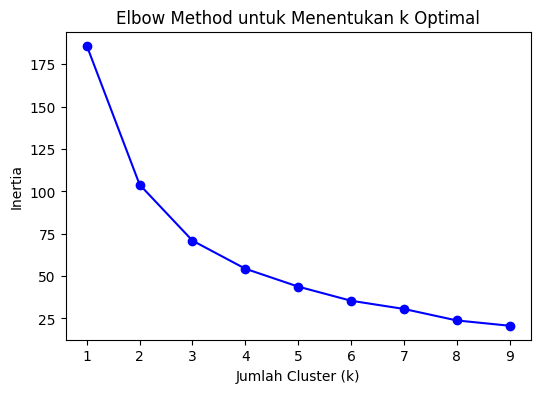

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()


In [7]:
from sklearn.cluster import KMeans
import pandas as pd

# === 1️⃣ Training Model ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# === 2️⃣ Lihat hasil clustering ===
print("✅ Clustering selesai! Contoh hasil:")
print(df[['developer_id', 'cluster']].head())

# === 3️⃣ Interpretasi awal ===
cluster_summary = df.groupby('cluster')[[
    'materials_completed', 'active_days', 'avg_rating',
    'avg_score', 'consistency_score', 'study_duration_total'
]].mean().round(2)

print("\n📊 Rata-rata per cluster:")
print(cluster_summary)


✅ Clustering selesai! Contoh hasil:
   developer_id  cluster
0          3390        0
1          5774        0
2         11836        0
3         17833        0
4         32258        1

📊 Rata-rata per cluster:
         materials_completed  active_days  avg_rating  avg_score  \
cluster                                                            
0                      67.65        36.82        2.37      10.29   
1                      94.56        53.67        2.00      73.89   
2                       2.40         2.00        0.00       0.00   

         consistency_score  study_duration_total  
cluster                                           
0                     0.51                344.06  
1                     0.73               1392.00  
2                     0.03                  0.00  


In [11]:
# Label baru sesuai definisi MVP
label_map = {
    0: 'Consistent Learner',
    1: 'Fast Learner',
    2: 'Reflective Learner'  # ganti dari "Inactive"
}

df['learner_type'] = df['cluster'].map(label_map)

# Simpan ulang
df.to_csv('clustered_learners.csv', index=False)
print("✅ Label diperbarui sesuai definisi MVP!")
print(df[['developer_id', 'cluster', 'learner_type']].head(10))


✅ Label diperbarui sesuai definisi MVP!
   developer_id  cluster        learner_type
0          3390        0  Consistent Learner
1          5774        0  Consistent Learner
2         11836        0  Consistent Learner
3         17833        0  Consistent Learner
4         32258        1        Fast Learner
5         96989        0  Consistent Learner
6        102556        1        Fast Learner
7        110119        0  Consistent Learner
8        113842        0  Consistent Learner
9        153116        0  Consistent Learner
